In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from collections import OrderedDict
from operator import *

from hpbandster.core.result import Run


C:\Users\Megan\Anaconda3\lib\site-packages\Pyro4\util.py:839: UserWarning: msgpack serializer unavailable. requires msgpack 0.5.2+, found (0, 5, 1)
  warnings.warn("msgpack serializer unavailable. requires msgpack 0.5.2+, found " + str(msgpack.version))


### Learning Rate
Compare learning rates: $[0.1, 0.01, 0.001, 0.0001]$

In [2]:
# import json files with validation error
path_epoch12 = '../results/lr/lr_epoch12/results_run'
path_epoch20 = '../results/lr/lr_epoch20/results_run'
path_epoch30 = '../results/lr/lr_epoch30/results_run'

files = ['_0.1.json', '_0.01.json', '_0.001.json', '_0.0001.json']
paths = [path_epoch12,path_epoch20, path_epoch30]
data = []

for path in paths:
    temp = []
    for file in files:
        with open(os.path.join(path + file)) as json_file:
            temp.append(json.load(json_file))
            
    data.append(temp)           

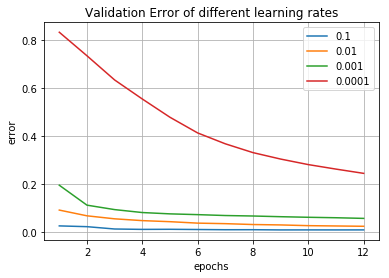

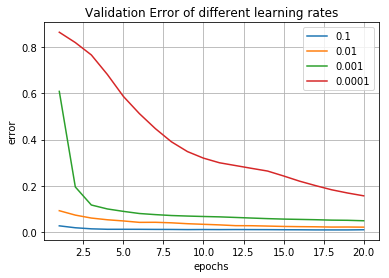

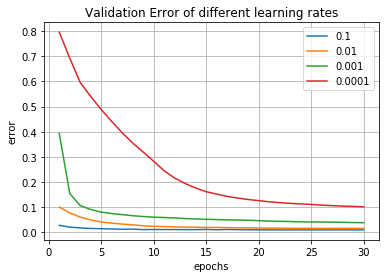

In [3]:
for test in data:
    for i in range(len(test)):
        max_epochs =len(test[i]["learning_curve"])
        #print(max_epochs)
        epochs = np.arange(1, max_epochs+1)
        #print(epochs)
        valid_error = test[i]["learning_curve"]
        plt.plot(epochs, valid_error, label = test[i]['lr'])

        plt.grid(True)
        plt.xlabel("epochs")
        plt.ylabel("error")
        plt.legend()
        plt.title("Validation Error of different learning rates")


    plt.savefig('../report/plots/lr/valid_error_%s.png' % str(max_epochs) , dpi=150)
    plt.show()

### Convolution Type
Compare filter sizes: $[1, 3, 5, 7]$

In [4]:
# import json files with validation error
path_epoch12 = '../results/filter/filter_epoch12/results_run'
path_epoch20 = '../results/filter/filter_epoch20/results_run'
path_epoch30 = '../results/filter/filter_epoch30/results_run'

files = ['_1.json', '_3.json', '_5.json', '_7.json']
paths = [path_epoch12,path_epoch20, path_epoch30]
data = []

for path in paths:
    temp = []
    for file in files:
        with open(os.path.join(path + file)) as json_file:
            temp.append(json.load(json_file))
            
    data.append(temp)      

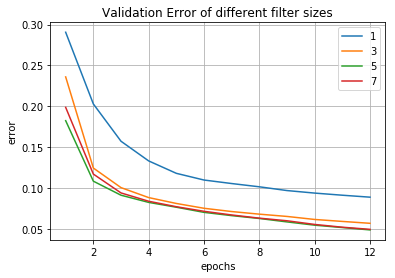

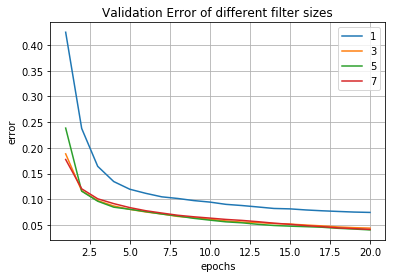

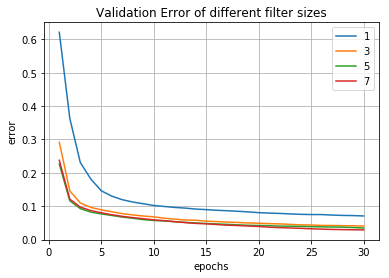

In [5]:
for test in data:
    #plt.figure(figsize=(5,10))
    for i in range(len(test)):
        max_epochs =len(test[i]["learning_curve"])
        #print(max_epochs)
        epochs = np.arange(1, max_epochs+1)
        #print(epochs)
        valid_error = test[i]["learning_curve"]
        plt.plot(epochs, valid_error, label = test[i]['filter_size'])

        plt.grid(True)
        plt.xlabel("epochs")
        plt.ylabel("error")
        #plt.yticks(np.arange(0, 0.7, step=0.05))
        plt.legend()
        plt.title("Validation Error of different filter sizes")


    plt.savefig('../report/plots/filter/valid_error_%s.png' % str(max_epochs) , dpi=150)
    plt.show()

### Random Search
#### Plot valid error of best config

In [6]:
# import json files with validation error
path_epoch12 = '../results/rs/rs_epoch12/results_run_best.json'
#path_epoch20 = '../results/filter/filter_epoch20/results_run'
#path_epoch30 = '../results/filter/filter_epoch30/results_run'

with open(path_epoch12) as json_file:
    best_run = json.load(json_file)


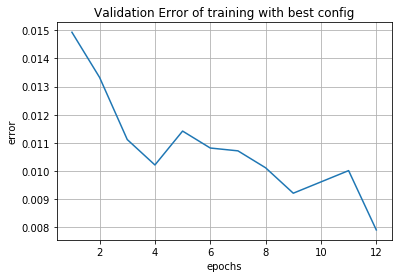

In [7]:
max_epochs =len(best_run["learning_curve"])
#print(max_epochs)
epochs = np.arange(1, max_epochs+1)
#print(epochs)
valid_error = best_run["learning_curve"]
plt.plot(epochs, valid_error)

plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
#plt.yticks(np.arange(0, 0.7, step=0.05))
#plt.legend()
plt.title("Validation Error of training with best config")


plt.savefig('../report/plots/rs/valid_error_%s.png' % str(max_epochs) , dpi=150)
plt.show()

#### Plot over time

In [8]:
# import json files with validation error
path_epoch12 = '../results/rs/rs_epoch12/allruns_results_run_9999.json'
#path_epoch20 = '../results/filter/filter_epoch20/results_run'
#path_epoch30 = '../results/filter/filter_epoch30/results_run'

with open(path_epoch12) as json_file:
    all_runs_dict = json.load(json_file)

all_runs_sorted = OrderedDict(sorted(all_runs_dict.items(), key=lambda x: getitem(x[1], 'config_id')))


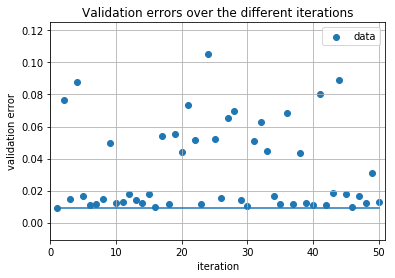

In [9]:
#print(all_runs_sorted)
#print(all_runs_sorted.items())

all_runs = []

for i, v in all_runs_sorted.items():
    # print(v)
    r = Run(config_id=v['config_id'],
            budget=v['budget'],
            loss=v['loss'],
            info=v['info'],
            time_stamps=v['time_stamps'],
            error_logs=None
            )
    all_runs.append(r)
    

# Compare source of:
#     import hpbandster.visualization as hpvis
#     hpvis.losses_over_time(all_runs)
import matplotlib.pyplot as plt
get_loss_from_run_fn = lambda r: r.loss
budgets = set([r.budget for r in all_runs])
data = {}
for b in budgets:
    data[b] = []
for i, r in enumerate(all_runs):
    if r.loss is None:
        continue
    b = r.budget
    # t = r.time_stamps['finished']
    l = get_loss_from_run_fn(r)
    t = i
    data[b].append((t,l))

for b in budgets:
    data[b].sort()


fig, ax = plt.subplots()

for i, b in enumerate(budgets):
    data[b] = np.array(data[b])
    #print(data[b])
    #print(data[b][:,0])
    #print(data[b][:,1])
    #print(range(len(data[b][:,0])))
    ax.scatter(range(1, len(data[b][:,0])+1), data[b][:,1], label='data')
    
    ax.step(range(1, len(data[b][:,0])+1), np.minimum.accumulate(data[b][:,1]), where='post')

ax.set_title('Validation errors over the different iterations')
ax.set_xlabel('iteration')
ax.set_ylabel('validation error')
plt.grid(True)
plt.xlim(0, len(data[b][:,0])+1)
ax.legend()

plt.savefig('../report/plots/rs/random_search.png' , dpi=150)
